In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
data.shape

(200000, 9)

# Data Preprocessing

In [19]:
data.isnull().sum()
data.drop(columns='Unnamed: 0',inplace=True)

In [20]:
data = data.dropna() #to remove missing values. 

In [21]:
data.drop_duplicates(inplace=True)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

X = data.drop(['fare_amount'],axis=1)
y = data['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Correlation

In [23]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


# Outliers Detection 

<Axes: >

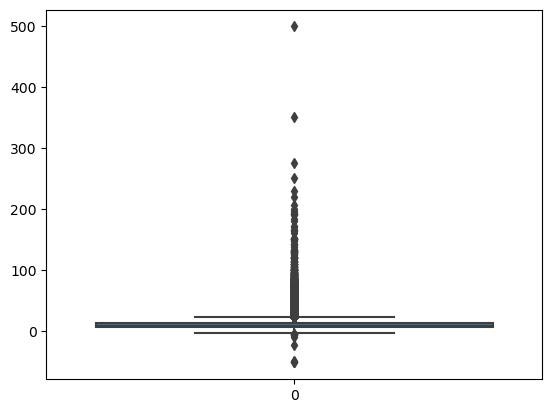

In [24]:
sns.boxplot(data['fare_amount'])

In [25]:
Q1 = np.percentile(data['fare_amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['fare_amount'], 75, interpolation = 'midpoint')
print(Q1,Q3)

6.0 12.5


# Outlier Treatment

<Axes: >

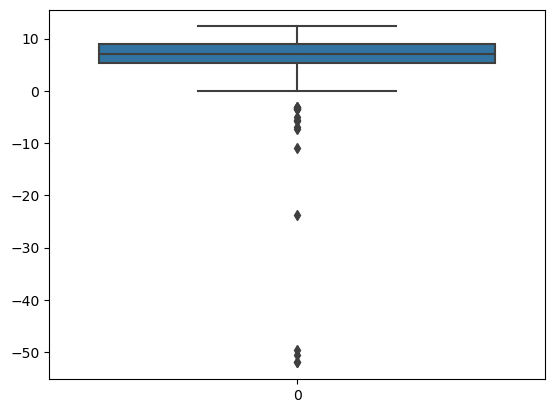

In [26]:
data.drop(data[data['fare_amount'].values>=12.5].index,inplace=True)
sns.boxplot(data['fare_amount'])

In [27]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)
y_pred_linear=linear_reg_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("Linear Regression Model:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression Model:
Linear Regression RMSE: 10.02
Linear Regression R-squared (R2): 0.00


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nRandom Forest Regression Model:")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")